# Loading libraries and files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import csv

# must edit filename to deserved one
#file = "../metrics/tests_MNIST/metrics_MNIST_at_[2024-06-25_14-51-36].csv"
file = "../metrics/tests_CIFAR100/metrics_CIFAR100_at_[2024-06-25_17-19-28].csv"

# must edit dataset name to deserved one
datasets = ["MNIST", "CIFAR100"]
dataset = file.split("_")[2]
print(dataset)

# setting some useful variables
NAME_MODIFIER = ""
is_old_names = False



CIFAR100


In [2]:
# making some useful functions

def plot_df_images(df, old_names=False):
    if not df.empty:
        # automatic path finding
        def get_image_path(row):
            method = row['method']
            initializer = row['initializer']
            img_idx = row['img_idx']
            exp = row['exp']

            # fixing old names so they can be found
            if old_names:
                #initializer = initializer.replace({'FB-NF':'fed_back_dirty', 'FB':'fed_back', 'original':'random'})
                initializer = initializer.replace('FB-NF', 'fed_back_dirty').replace('FB', 'fed_back').replace('original', 'random')
                # must change to deserved path, not 100% automatic yet
                return f'../results_v5.7/iDLG_{dataset}/exp_{exp}_{method}_on_[{img_idx}]_{initializer}.png'
            
            return f"../results/DLG-FB_{dataset}/exp_{exp}_{method}_on_img[{img_idx}]_{initializer}.png"

        # add image paths to dataframe
        df['image_path'] = df.apply(get_image_path, axis=1)
        # print(df['image_path'])

        # Check if exists
        df = df[df['image_path'].apply(os.path.exists)]

        # unpacking image paths
        img_file_paths = df['image_path'].tolist()

        # taking subplot information
        num_images = len(img_file_paths)
        # print(num_images)
        num_cols = 4  # columns arbitrarily choosen
        num_rows = (num_images // num_cols) + (1 if num_images % num_cols != 0 else 0)
        #num_rows = 3 # something is broken...

        # create subplots
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

        # Flatten matrix for simple iteration
        axes = axes.flatten()

        # filter out empty subplots
        for ax in axes[num_images:]:
            fig.delaxes(ax)

        # plot images
        for ax, imageName in zip(axes, img_file_paths):
            img = plt.imread(imageName)
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(os.path.basename(imageName), fontsize=8)

        # adjust layout
        plt.tight_layout()
        plt.show()
    else:
        print("No images found")



# Checking if dataset is correctly loaded

In [3]:

# must edit filename to deserved one
df = pd.read_csv(file)

# testing other possibilities...
#df = df[df["exp"] < 500]

TOTAL_EXP = len(df["exp"].unique())

df

img_idx method initializer  exp  iters  gt_label  dummy_label  pred_label  \
0     46568    DLG      random    0     21        51            1          34   
1     46568    DLG       FB-NF    0     21        51           51          34   
2     46568   iDLG      random    0     21        51           51          38   
3     46568   iDLG       FB-NF    0     21        51           51          38   
4     33856    DLG      random    1     21        48           72          11   
..      ...    ...         ...  ...    ...       ...          ...         ...   
88    41431    DLG      random   19    199        21           21          10   
89    41431    DLG       FB-NF   19     21        21           59          10   
90    41431   iDLG      random   19    131        21           21          10   
91    41431   iDLG       FB-NF   19     21        21           21          56   
92    41431   iDLG          FB   19     67        21           21          10   

    converged          loss           mse  
0       False  9.204797e+02  4.642777e+09  
1       False  2.358752e+02  1.160693e+09  
2       False  4.985190e+02  1.157500e+08  
3       False  4.661412e+02  4.534413e+09  
4       False  1.215409e+03  1.877281e+09  
..        ...           ...           ...  
88      False  3.430595e-06  2.447822e-06  
89      False  1.035414e+03  2.611561e+09  
90       True  9.426637e-07  1.108455e-05  
91      False  6.426760e+02  1.657495e+26  
92       True  9.769398e-07  6.817050e-06  

[93 rows x 11 columns]

In [4]:
print(df.dtypes)

img_idx          int64
method          object
initializer     object
exp              int64
iters            int64
gt_label         int64
dummy_label      int64
pred_label       int64
converged         bool
loss           float64
mse            float64
dtype: object


In [5]:
# Breaks plot_df_images by now
# Correcting the old names
if is_old_names:
    df['initializer'] = df['initializer'].replace({'fed_back_dirty': 'FB-NF', 'fed_back': 'FB', 'random': 'original'})
#else:
    #df['initializer'] = df['initializer'].replace({'random': 'original'})

df

img_idx method initializer  exp  iters  gt_label  dummy_label  pred_label  \
0     46568    DLG      random    0     21        51            1          34   
1     46568    DLG       FB-NF    0     21        51           51          34   
2     46568   iDLG      random    0     21        51           51          38   
3     46568   iDLG       FB-NF    0     21        51           51          38   
4     33856    DLG      random    1     21        48           72          11   
..      ...    ...         ...  ...    ...       ...          ...         ...   
88    41431    DLG      random   19    199        21           21          10   
89    41431    DLG       FB-NF   19     21        21           59          10   
90    41431   iDLG      random   19    131        21           21          10   
91    41431   iDLG       FB-NF   19     21        21           21          56   
92    41431   iDLG          FB   19     67        21           21          10   

    converged          loss           mse  
0       False  9.204797e+02  4.642777e+09  
1       False  2.358752e+02  1.160693e+09  
2       False  4.985190e+02  1.157500e+08  
3       False  4.661412e+02  4.534413e+09  
4       False  1.215409e+03  1.877281e+09  
..        ...           ...           ...  
88      False  3.430595e-06  2.447822e-06  
89      False  1.035414e+03  2.611561e+09  
90       True  9.426637e-07  1.108455e-05  
91      False  6.426760e+02  1.657495e+26  
92       True  9.769398e-07  6.817050e-06  

[93 rows x 11 columns]

# Correct missing/inaccurate data

In [6]:

# simplfying the method_initializer column
df['method_initializer'] = df['method'] + '_' + df['initializer']

# Cumulated convergencies
df['convergencies'] = df.groupby('method_initializer')['converged'].cumsum()

# if not converged, it means that it took 100 iterations
df.loc[df['converged'] == False, 'iters'] = 200

# Check if worked
df.head(20)


img_idx method initializer  exp  iters  gt_label  dummy_label  pred_label  \
0     46568    DLG      random    0    200        51            1          34   
1     46568    DLG       FB-NF    0    200        51           51          34   
2     46568   iDLG      random    0    200        51           51          38   
3     46568   iDLG       FB-NF    0    200        51           51          38   
4     33856    DLG      random    1    200        48           72          11   
5     33856    DLG       FB-NF    1    200        48           48          11   
6     33856   iDLG      random    1    200        48           48          11   
7     33856   iDLG       FB-NF    1    200        48           48          11   
8     33596    DLG      random    2    200        65           93          42   
9     33596    DLG       FB-NF    2    200        65           65          66   
10    33596   iDLG      random    2    200        65           65          42   
11    33596   iDLG       FB-NF    2    200        65           65          42   
12     3625    DLG      random    3    200        62           62          26   
13     3625    DLG       FB-NF    3    200        62           62          26   
14     3625   iDLG      random    3    131        62           62          26   
15     3625   iDLG       FB-NF    3    200        62           62          26   
16    43338    DLG      random    4    200        48           48          94   
17    43338    DLG       FB-NF    4    200        48           48          10   
18    43338   iDLG      random    4    200        48           48          94   
19    43338   iDLG       FB-NF    4    200        48           48          62   

    converged          loss           mse method_initializer  convergencies  
0       False  9.204797e+02  4.642777e+09         DLG_random              0  
1       False  2.358752e+02  1.160693e+09          DLG_FB-NF              0  
2       False  4.985190e+02  1.157500e+08        iDLG_random              0  
3       False  4.661412e+02  4.534413e+09         iDLG_FB-NF              0  
4       False  1.215409e+03  1.877281e+09         DLG_random              0  
5       False  3.225730e+02  2.611563e+09          DLG_FB-NF              0  
6       False  6.717888e+00  3.596555e+01        iDLG_random              0  
7       False  5.472795e+02  6.510931e+07         iDLG_FB-NF              0  
8       False  9.170057e+02  3.919729e+09         DLG_random              0  
9       False  3.615589e+02  2.611563e+09          DLG_FB-NF              0  
10      False  3.609316e+02  2.281464e+18        iDLG_random              0  
11      False  2.645501e+02  6.629980e+26         iDLG_FB-NF              0  
12      False  4.992814e-06  4.314383e-05         DLG_random              0  
13      False  1.666474e+02  2.611562e+09          DLG_FB-NF              0  
14       True  9.918848e-07  2.013994e-05        iDLG_random              1  
15      False  3.104120e+02  1.657495e+26         iDLG_FB-NF              0  
16      False  5.523838e-06  1.187215e-04         DLG_random              0  
17      False  3.354247e+02  2.611561e+09          DLG_FB-NF              0  
18      False  6.030084e-06  1.877473e-04        iDLG_random              1  
19      False  4.575518e+02  1.657495e+26         iDLG_FB-NF              0

## Dealing with false negative convergences

In [7]:
# testing values that corresponds to true convergence (it was choosen by visual analisys)
# for MNIST, loss <= 0.1 and mse <= 0.001
MIN_LOSS = 0.1; MIN_MSE = 0.001 # MNIST


df_false_negative = df.loc[(df['converged'] == False) & ((df['loss'] <= MIN_LOSS) & (df['mse'] <= MIN_MSE))].sort_values(by="mse", ascending=False)
df_false_negative
#len(df_false_negative)

img_idx method initializer  exp  iters  gt_label  dummy_label  pred_label  \
24    20013    DLG      random    6    200        55           55          43   
68    46174    DLG      random   15    200        24           24          11   
83    31229    DLG      random   18    200        19           19           4   
26    20013   iDLG      random    6    200        55           55          43   
18    43338   iDLG      random    4    200        48           48          94   
16    43338    DLG      random    4    200        48           48          94   
85    31229   iDLG      random   18    200        19           19           4   
60    38824   iDLG      random   13    200        45           45           6   
72    46174   iDLG          FB   15    200        24           24          11   
50     2593   iDLG      random   11    200        18           18          65   
12     3625    DLG      random    3    200        62           62          26   
43    49989    DLG      random   10    200        64           64          53   
47    49989   iDLG          FB   10    200        64           64          53   
80     5540   iDLG      random   17    200        19           19          29   
57    41252   iDLG          FB   12    200        50           50          82   
45    49989   iDLG      random   10    200        64           64          53   
75     9817   iDLG      random   16    200        47           47          29   
62    38824   iDLG          FB   13    200        45           45           6   
73     9817    DLG      random   16    200        47           47          29   
82     5540   iDLG          FB   17    200        19           19          29   
77     9817   iDLG          FB   16    200        47           47          29   
37      686   iDLG          FB    8    200        19           19          66   
35      686   iDLG      random    8    200        19           19          66   
33      686    DLG      random    8    200        19           19          66   
20    10546    DLG      random    5    200        21           21           4   
38    24113    DLG      random    9    200        12           12          46   
88    41431    DLG      random   19    200        21           21          10   

    converged      loss       mse method_initializer  convergencies  
24      False  0.000007  0.000221         DLG_random              0  
68      False  0.000004  0.000199         DLG_random              1  
83      False  0.000003  0.000197         DLG_random              1  
26      False  0.000005  0.000188        iDLG_random              2  
18      False  0.000006  0.000188        iDLG_random              1  
16      False  0.000006  0.000119         DLG_random              0  
85      False  0.000001  0.000080        iDLG_random              5  
60      False  0.000004  0.000078        iDLG_random              4  
72      False  0.000001  0.000059            iDLG_FB              4  
50      False  0.000002  0.000051        iDLG_random              4  
12      False  0.000005  0.000043         DLG_random              0  
43      False  0.000004  0.000042         DLG_random              1  
47      False  0.000002  0.000036            iDLG_FB              2  
80      False  0.000002  0.000035        iDLG_random              5  
57      False  0.000001  0.000031            iDLG_FB              3  
45      False  0.000001  0.000029        iDLG_random              4  
75      False  0.000002  0.000029        iDLG_random              5  
62      False  0.000002  0.000028            iDLG_FB              3  
73      False  0.000006  0.000025         DLG_random              1  
82      False  0.000001  0.000016            iDLG_FB              4  
77      False  0.000002  0.000014            iDLG_FB              4  
37      False  0.000001  0.000013            iDLG_FB              1  
35      False  0.000001  0.000012        iDLG_random              3  
33      False  0.000006  0.000008         DLG_random   

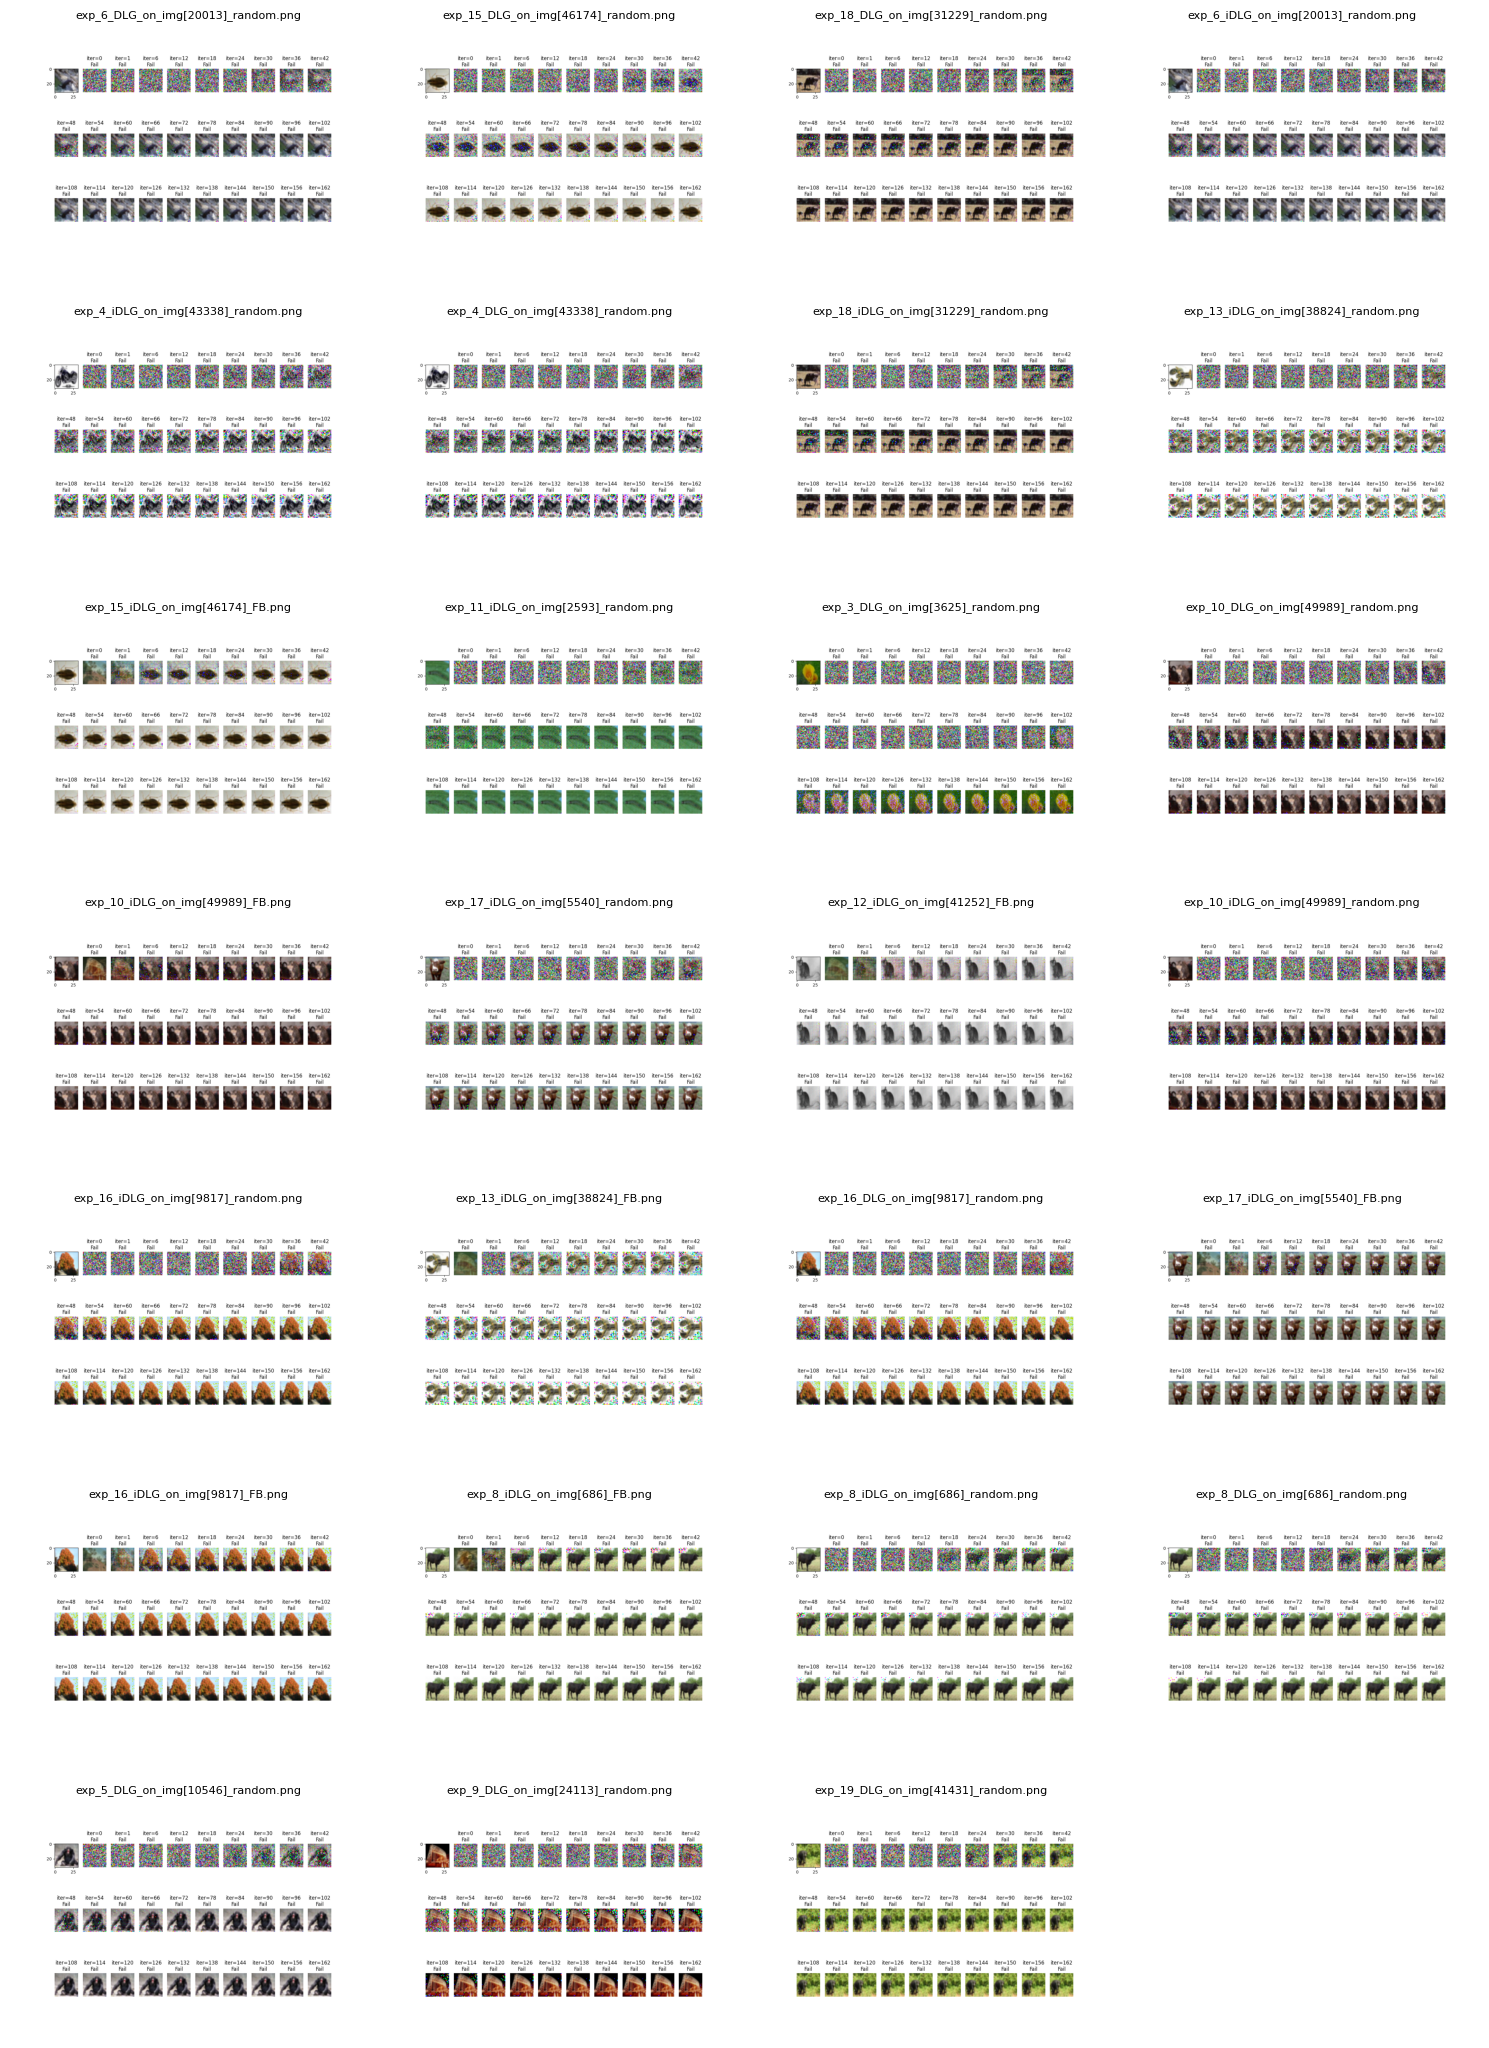

In [8]:

plot_df_images(df_false_negative, is_old_names)


In [9]:
# after visual analisys and experimentation, we may fix false negatives (if needed)
df.loc[(df['converged'] == False) & ((df['loss'] <= MIN_LOSS) & (df['mse'] <= MIN_MSE)), 'converged'] = True

### Investigating fails

In [10]:
# old
# df_fails = df.loc[(df['converged'] == False) & (df['loss'] <= 1) ].sort_values(by="loss", ascending=False)
df_fails = df.loc[(df['converged'] == False)].sort_values(by="loss", ascending=False)

df_fails

img_idx method initializer  exp  iters  gt_label  dummy_label  pred_label  \
44    49989    DLG       FB-NF   10    200        64           53          99   
29    36561    DLG       FB-NF    7    200        88           60          57   
4     33856    DLG      random    1    200        48           72          11   
89    41431    DLG       FB-NF   19    200        21           59          10   
58    38824    DLG      random   13    200        45            7           6   
0     46568    DLG      random    0    200        51            1          34   
8     33596    DLG      random    2    200        65           93          42   
39    24113    DLG       FB-NF    9    200        12           84          46   
49     2593    DLG       FB-NF   11    200        18           78          44   
34      686    DLG       FB-NF    8    200        19           40          66   
63    37676    DLG      random   14    200        59           59          35   
79     5540    DLG       FB-NF   17    200        19           57          57   
64    37676    DLG       FB-NF   14    200        59           97          97   
91    41431   iDLG       FB-NF   19    200        21           21          56   
7     33856   iDLG       FB-NF    1    200        48           48          11   
84    31229    DLG       FB-NF   18    200        19           67          60   
76     9817   iDLG       FB-NF   16    200        47           47          16   
2     46568   iDLG      random    0    200        51           51          38   
78     5540    DLG      random   17    200        19           19          29   
3     46568   iDLG       FB-NF    0    200        51           51          38   
19    43338   iDLG       FB-NF    4    200        48           48          62   
9     33596    DLG       FB-NF    2    200        65           65          66   
10    33596   iDLG      random    2    200        65           65          42   
36      686   iDLG       FB-NF    8    200        19           19          66   
17    43338    DLG       FB-NF    4    200        48           48          10   
5     33856    DLG       FB-NF    1    200        48           48          11   
74     9817    DLG       FB-NF   16    200        47           47          16   
61    38824   iDLG       FB-NF   13    200        45           45           6   
15     3625   iDLG       FB-NF    3    200        62           62          26   
66    37676   iDLG       FB-NF   14    200        59           59          97   
56    41252   iDLG       FB-NF   12    200        50           50          82   
11    33596   iDLG       FB-NF    2    200        65           65          42   
48     2593    DLG      random   11    200        18           18          65   
59    38824    DLG       FB-NF   13    200        45           45           6   
41    24113   iDLG       FB-NF    9    200        12           12          46   
31    36561   iDLG       FB-NF    7    200        88           88          57   
1     46568    DLG       FB-NF    0    200        51           51          34   
81     5540   iDLG       FB-NF   17    200        19           19          57   
71    46174   iDLG       FB-NF   15    200        24           24          74   
54    41252    DLG       FB-NF   12    200        50           50          82   
25    20013    DLG       FB-NF    6    200        55           55          43   
23    10546   iDLG       FB-NF    5    200        21           21           3   
51     2593   iDLG       FB-NF   11    200        18           18          65   
21    10546    DLG       FB-NF    5    200        21           21           4   
27    20013   iDLG       FB-NF    6    200        55           55          32   
13     3625    DLG       FB-NF    3    200        62           62          26   
69    46174    DLG       FB-NF   15    200        24           24          17   
46    49989   iDLG       FB-NF   10    200        64           64          53   
86    31229   iDLG       FB-NF   18

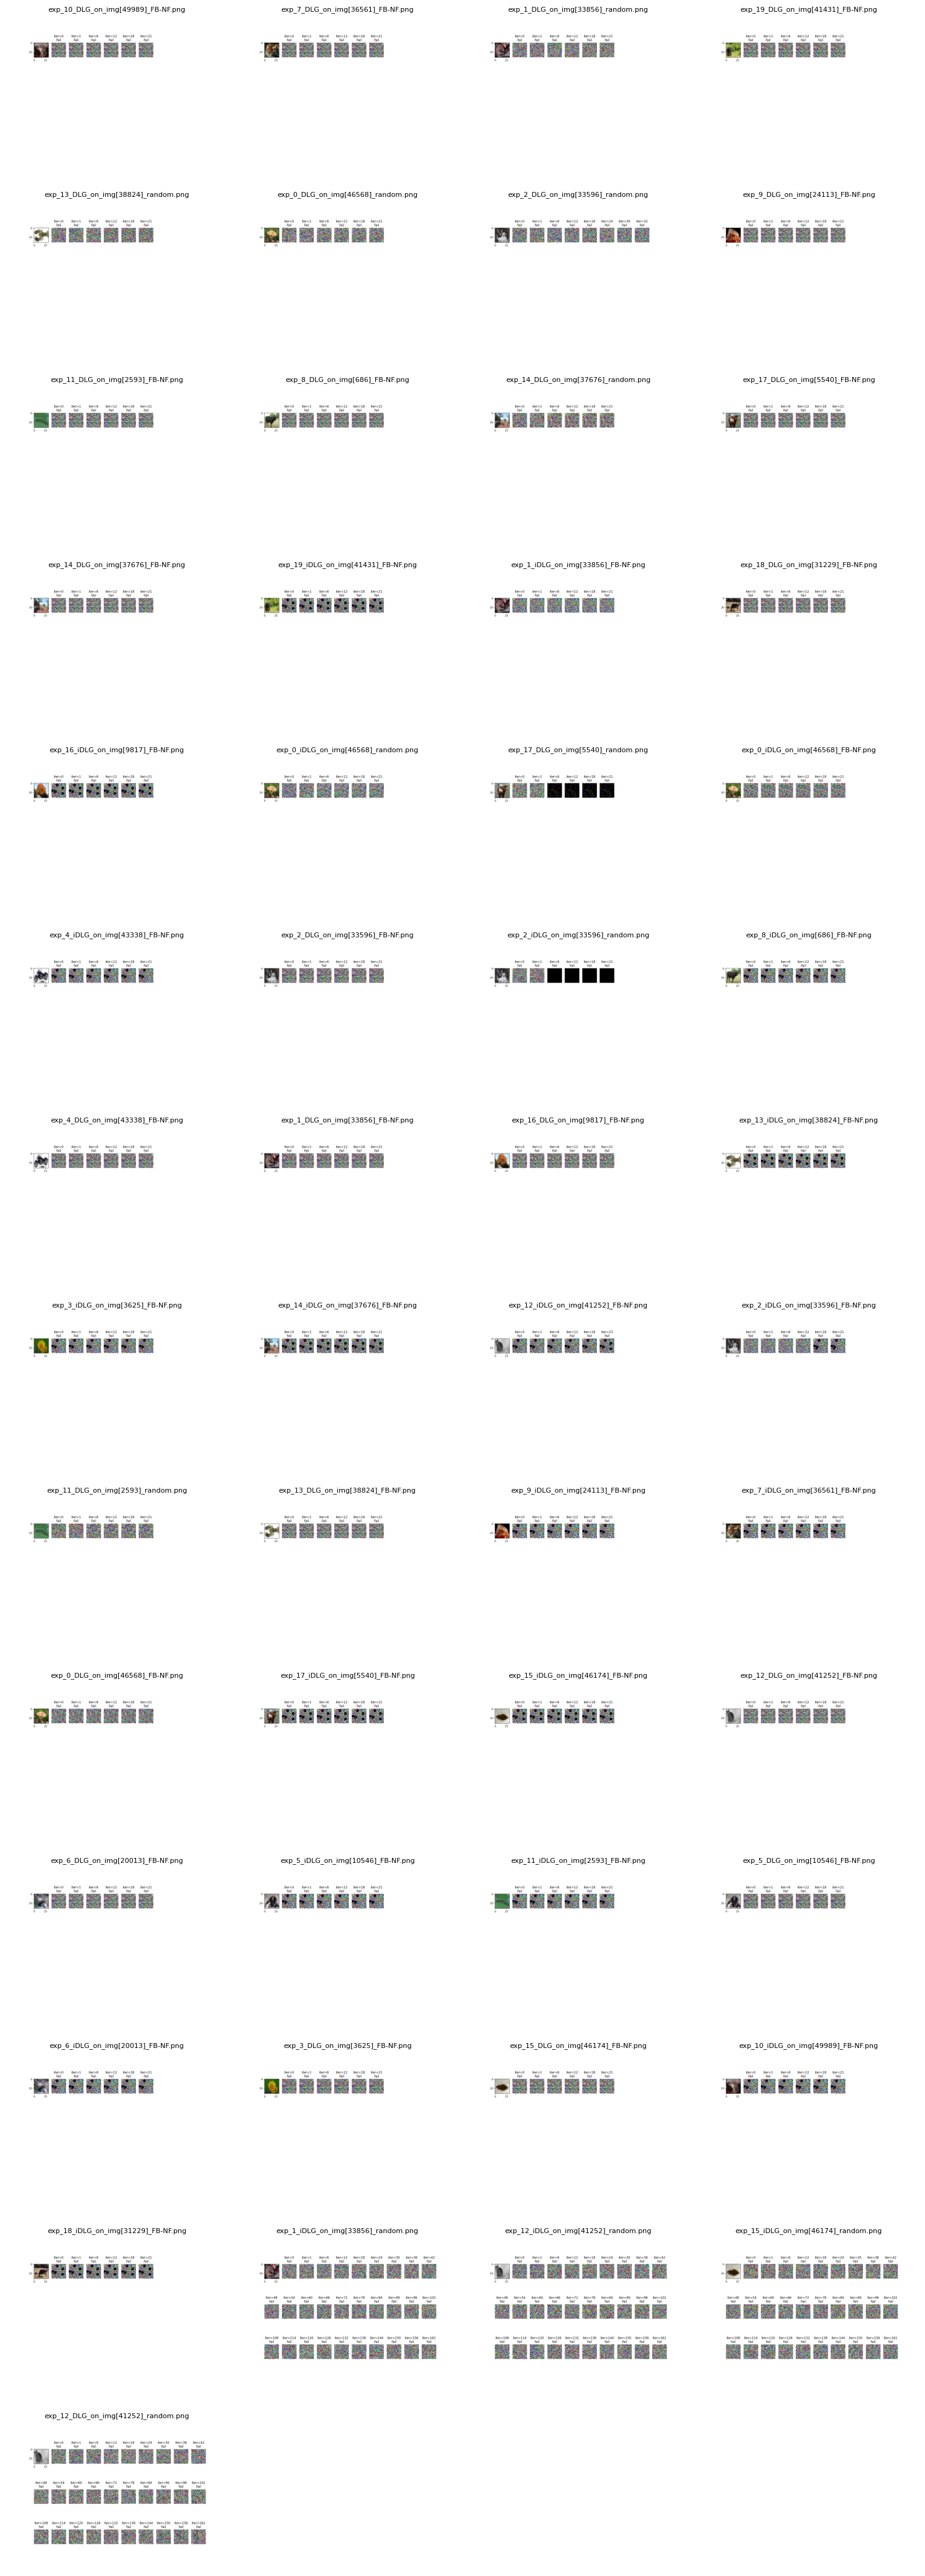

In [11]:
plot_df_images(df_fails, is_old_names)

# Understanding convergences

## false (or very noisy) positives

In [12]:
# Filtering just converged occurencies
#df_converged_sample = df[df['converged'] == True]

# Filtering just the worst converged occurencies
df_converged_sample = df[(df['converged'] == True) & (df['mse'] >= 0.0001)]

df_converged_sample


img_idx method initializer  exp  iters  gt_label  dummy_label  pred_label  \
16    43338    DLG      random    4    200        48           48          94   
18    43338   iDLG      random    4    200        48           48          94   
24    20013    DLG      random    6    200        55           55          43   
26    20013   iDLG      random    6    200        55           55          43   
68    46174    DLG      random   15    200        24           24          11   
83    31229    DLG      random   18    200        19           19           4   

    converged      loss       mse method_initializer  convergencies  
16       True  0.000006  0.000119         DLG_random              0  
18       True  0.000006  0.000188        iDLG_random              1  
24       True  0.000007  0.000221         DLG_random              0  
26       True  0.000005  0.000188        iDLG_random              2  
68       True  0.000004  0.000199         DLG_random              1  
83       True  0.000003  0.000197         DLG_random              1

In [13]:

df_converged_sample = df_converged_sample.sort_values(by="mse", ascending=False)
#df_converged_sample = df_converged_sample.sort_values(by="loss", ascending=False)
df_converged_sample

#df.loc[(df['converged'] == True) & ((df['loss'] <= MIN_LOSS) & (df['mse'] <= MIN_MSE))].sort_values(by="mse", ascending=True)

img_idx method initializer  exp  iters  gt_label  dummy_label  pred_label  \
24    20013    DLG      random    6    200        55           55          43   
68    46174    DLG      random   15    200        24           24          11   
83    31229    DLG      random   18    200        19           19           4   
26    20013   iDLG      random    6    200        55           55          43   
18    43338   iDLG      random    4    200        48           48          94   
16    43338    DLG      random    4    200        48           48          94   

    converged      loss       mse method_initializer  convergencies  
24       True  0.000007  0.000221         DLG_random              0  
68       True  0.000004  0.000199         DLG_random              1  
83       True  0.000003  0.000197         DLG_random              1  
26       True  0.000005  0.000188        iDLG_random              2  
18       True  0.000006  0.000188        iDLG_random              1  
16       True  0.000006  0.000119         DLG_random              0

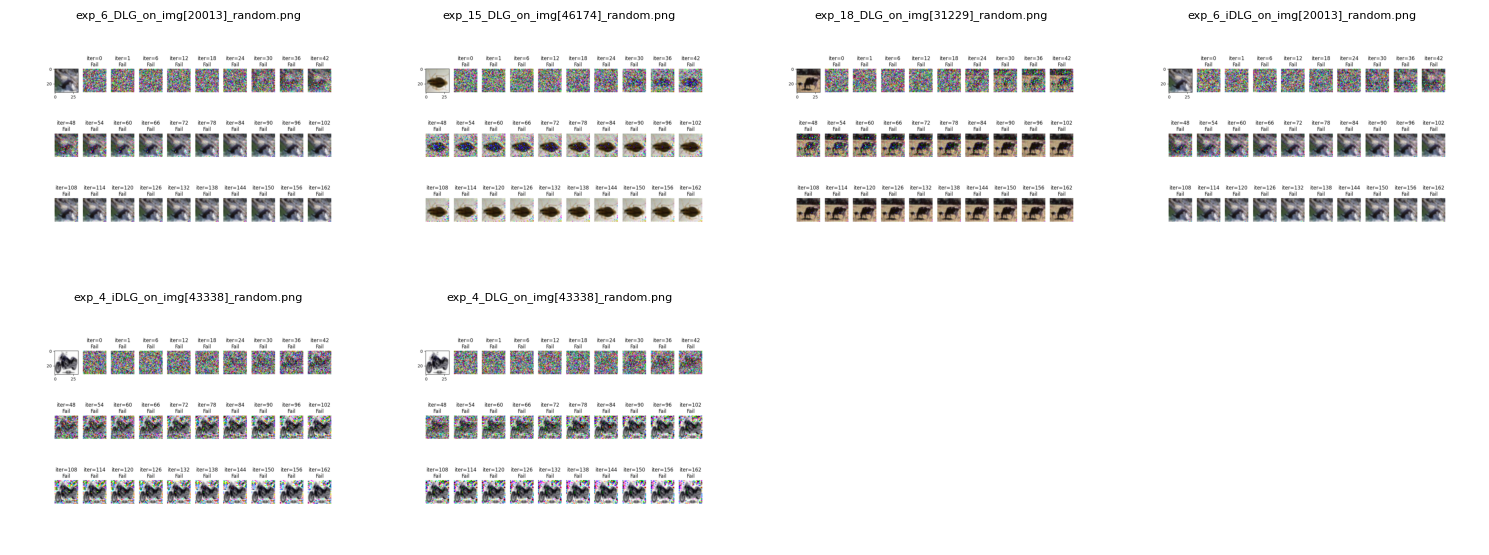

In [14]:

plot_df_images(df_converged_sample)


## Feedback with undesired noisy convergences

In [15]:

df_fb_problems = df[(df['converged'] == True) & (df['initializer'] == "FB") & (df['mse'] >= 0.00005)].sort_values(by="mse", ascending=False)
len(df_fb_problems)
df_fb_problems


img_idx method initializer  exp  iters  gt_label  dummy_label  pred_label  \
72    46174   iDLG          FB   15    200        24           24          11   

    converged      loss       mse method_initializer  convergencies  
72       True  0.000001  0.000059            iDLG_FB              4

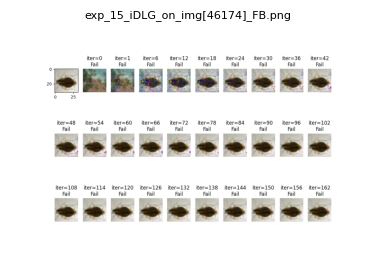

In [16]:

plot_df_images(df_fb_problems)


#### in DLG

In [17]:


df_fb_problems_dlg = df_fb_problems[(df_fb_problems['method'] == "DLG")].sort_values(by="exp", ascending=True)
df_fb_problems_dlg


Empty DataFrame
Columns: [img_idx, method, initializer, exp, iters, gt_label, dummy_label, pred_label, converged, loss, mse, method_initializer, convergencies, image_path]
Index: []

In [18]:

plot_df_images(df_fb_problems_dlg)


No images found


#### in iDLG

In [19]:

df_fb_problems_idlg = df_fb_problems[(df_fb_problems['method'] == "iDLG")].sort_values(by="exp", ascending=True)
df_fb_problems_idlg


img_idx method initializer  exp  iters  gt_label  dummy_label  pred_label  \
72    46174   iDLG          FB   15    200        24           24          11   

    converged      loss       mse method_initializer  convergencies  \
72       True  0.000001  0.000059            iDLG_FB              4   

                                           image_path  
72  ../results/DLG-FB_CIFAR100/exp_15_iDLG_on_img[...

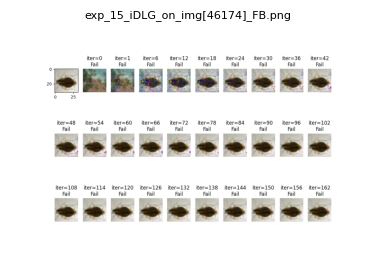

In [20]:

plot_df_images(df_fb_problems_idlg)


## visualizing fed_back_dirty failures

In [21]:

df_fbnf  = df[(df['initializer'] == "FB-NF")].sort_values(by="exp", ascending=True)

df_fbnf 


img_idx method initializer  exp  iters  gt_label  dummy_label  pred_label  \
1     46568    DLG       FB-NF    0    200        51           51          34   
3     46568   iDLG       FB-NF    0    200        51           51          38   
5     33856    DLG       FB-NF    1    200        48           48          11   
7     33856   iDLG       FB-NF    1    200        48           48          11   
9     33596    DLG       FB-NF    2    200        65           65          66   
11    33596   iDLG       FB-NF    2    200        65           65          42   
13     3625    DLG       FB-NF    3    200        62           62          26   
15     3625   iDLG       FB-NF    3    200        62           62          26   
17    43338    DLG       FB-NF    4    200        48           48          10   
19    43338   iDLG       FB-NF    4    200        48           48          62   
21    10546    DLG       FB-NF    5    200        21           21           4   
23    10546   iDLG       FB-NF    5    200        21           21           3   
25    20013    DLG       FB-NF    6    200        55           55          43   
27    20013   iDLG       FB-NF    6    200        55           55          32   
29    36561    DLG       FB-NF    7    200        88           60          57   
31    36561   iDLG       FB-NF    7    200        88           88          57   
34      686    DLG       FB-NF    8    200        19           40          66   
36      686   iDLG       FB-NF    8    200        19           19          66   
39    24113    DLG       FB-NF    9    200        12           84          46   
41    24113   iDLG       FB-NF    9    200        12           12          46   
44    49989    DLG       FB-NF   10    200        64           53          99   
46    49989   iDLG       FB-NF   10    200        64           64          53   
49     2593    DLG       FB-NF   11    200        18           78          44   
51     2593   iDLG       FB-NF   11    200        18           18          65   
54    41252    DLG       FB-NF   12    200        50           50          82   
56    41252   iDLG       FB-NF   12    200        50           50          82   
59    38824    DLG       FB-NF   13    200        45           45           6   
61    38824   iDLG       FB-NF   13    200        45           45           6   
64    37676    DLG       FB-NF   14    200        59           97          97   
66    37676   iDLG       FB-NF   14    200        59           59          97   
69    46174    DLG       FB-NF   15    200        24           24          17   
71    46174   iDLG       FB-NF   15    200        24           24          74   
74     9817    DLG       FB-NF   16    200        47           47          16   
76     9817   iDLG       FB-NF   16    200        47           47          16   
79     5540    DLG       FB-NF   17    200        19           57          57   
81     5540   iDLG       FB-NF   17    200        19           19          57   
84    31229    DLG       FB-NF   18    200        19           67          60   
86    31229   iDLG       FB-NF   18    200        19           19           4   
89    41431    DLG       FB-NF   19    200        21           59          10   
91    41431   iDLG       FB-NF   19    200        21           21          56   

    converged         loss           mse method_initializer  convergencies  
1       False   235.875183  1.160693e+09          DLG_FB-NF              0  
3       False   466.141205  4.534413e+09         iDLG_FB-NF              0  
5       False   322.572998  2.611563e+09          DLG_FB-NF              0  
7       False   547.279541  6.510931e+07         iDLG_FB-NF              0  
9       False   361.558868  2.611563e+09          DLG_FB-NF              0  
11      False   264.550079  6.629980e+26         iDLG_FB-NF              0  
13      False   166.647385  2.611562e+09          DLG_FB-NF              0  
15      False   310.411957  1.657495e+26         iDLG_FB-NF       

In [22]:

#plot_df_images(df_fbnf.iloc[500:550])
#plot_df_images(df_fbnf)


# Ploting metrics

In [23]:
# Seting path to save the images
graphics_path = "../graphics"
if not os.path.exists(graphics_path):
    os.makedirs(graphics_path)


## Cumulated convergencies

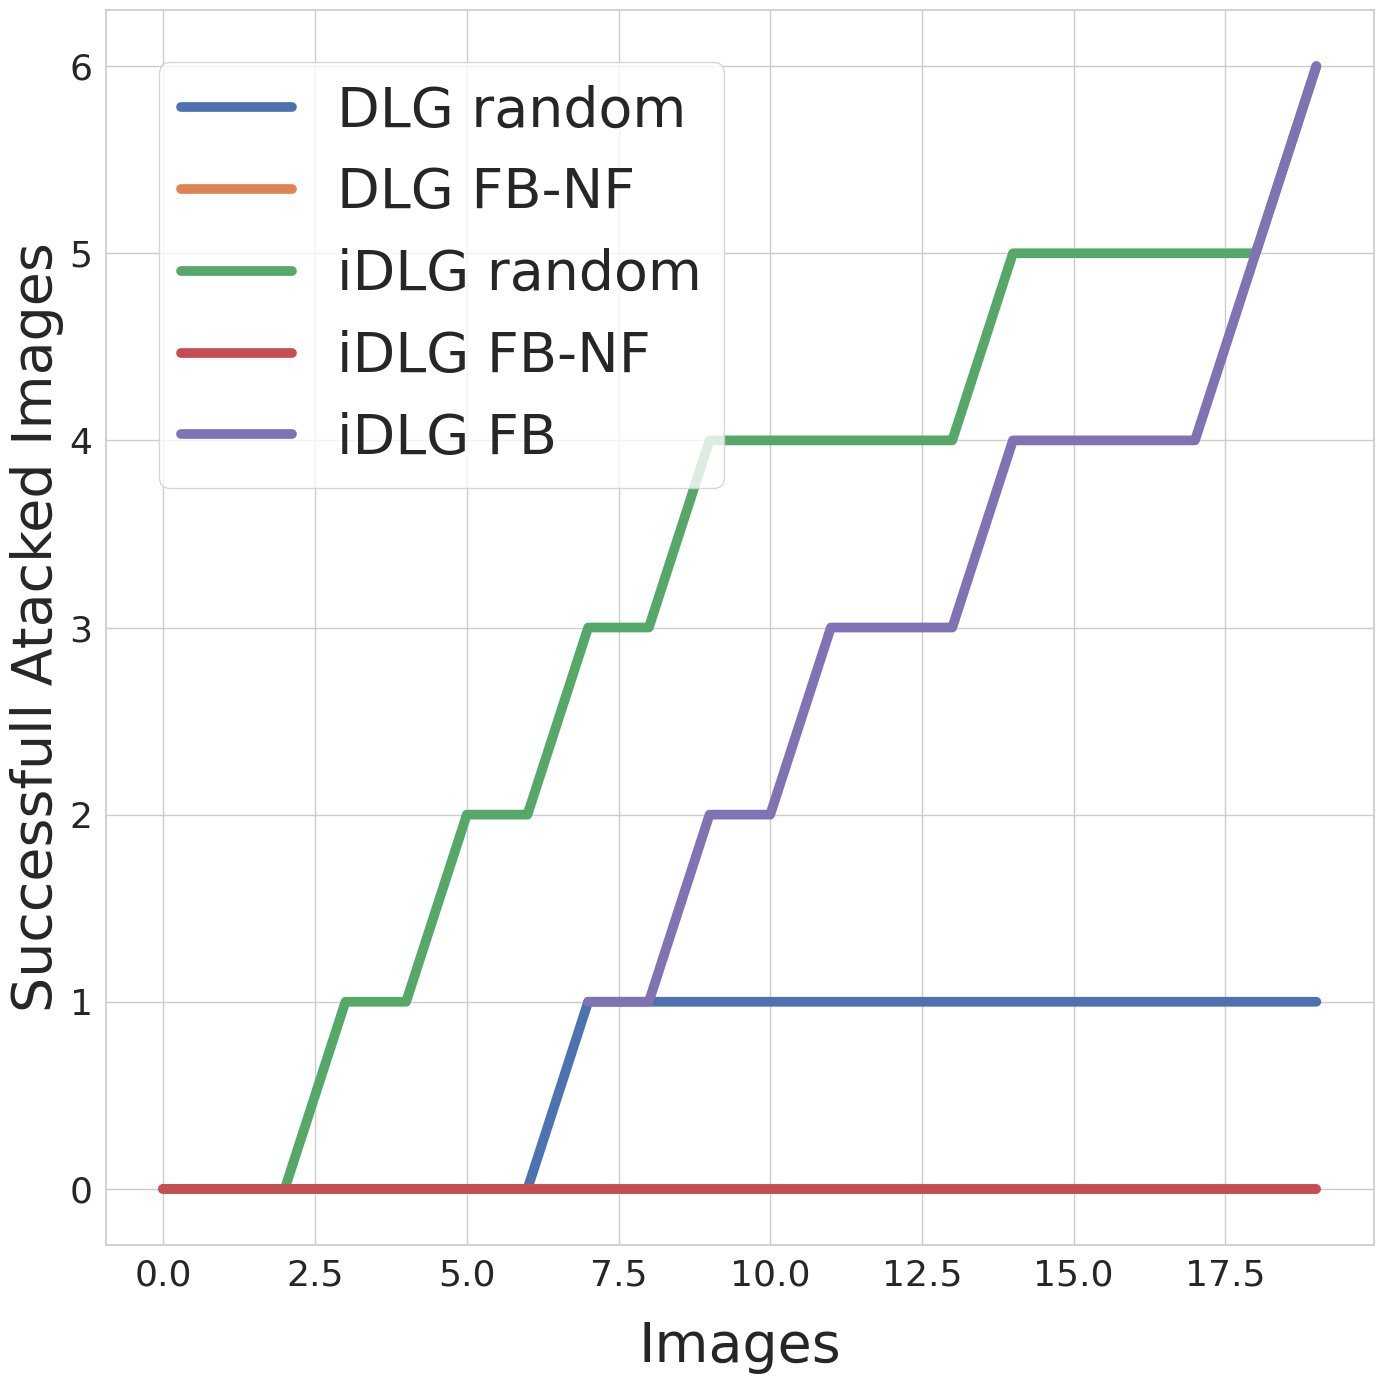

In [24]:

# Set graph theme
sns.set_theme(style="whitegrid")

# Choose figure size and proportions
#plt.figure(figsize=(14, 8))
plt.figure(figsize=(14, 14)) # used for article

# the tmp_df is just for visual purposes
tmp_df = df
tmp_df['method_initializer'] = tmp_df['method_initializer'].str.replace('_', ' ', 1)

# plot the cumulated convergencies
sns.lineplot(data=tmp_df.sort_values(by=["method", "initializer"], ascending=[True, False]), x='exp', y='convergencies', hue='method_initializer', linewidth=7.0)

# Set graph labels
#plt.title(f"Cumulated convergencies for each method-initializer\nDataset: {DATASET}", fontsize=22)

#plt.xlabel("Experiment", fontsize=20)
#plt.xlabel(f"{DATASET} Images", fontsize=34, labelpad=20) # comented for article usage
plt.xlabel(f"Images", fontsize=40, labelpad=20)

#plt.ylabel("Cumulated convergencies", fontsize=20)
plt.ylabel("Successfull Atacked Images", fontsize=40)

plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

#plt.legend(title='method_initializer', bbox_to_anchor=(0.02, 0.98), loc='upper left', fontsize=18, title_fontsize=20, frameon=True)
plt.legend(bbox_to_anchor=(0.02, 0.98), loc='upper left', fontsize=40, frameon=True)


# Adjust the aspect ratio
#plt.gca().set_aspect(aspect='equal')

# Exibir o gráfico
plt.tight_layout()

#plt.savefig(f"./graphics/{DATASET}_{TOTAL_EXP}_cumulated_convergencies{NAME_MODIFIER}.png")
# saving with high resolution
plt.savefig(f"{graphics_path}/{dataset}_{TOTAL_EXP}_cumulated_convergencies{NAME_MODIFIER}.pdf", dpi=300)

plt.show()


In [25]:
# Query the maximum convergences for each method_initializer
max_convergencies = tmp_df.groupby('method_initializer')['convergencies'].max().reset_index()

max_convergencies

method_initializer  convergencies
0          DLG FB-NF              0
1         DLG random              1
2            iDLG FB              6
3         iDLG FB-NF              0
4        iDLG random              6

In [26]:
#plot_df_images(tmp_df.loc[tmp_df["method_initializer"] == "DLG FB-NF"])

## mean iterations to converge 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


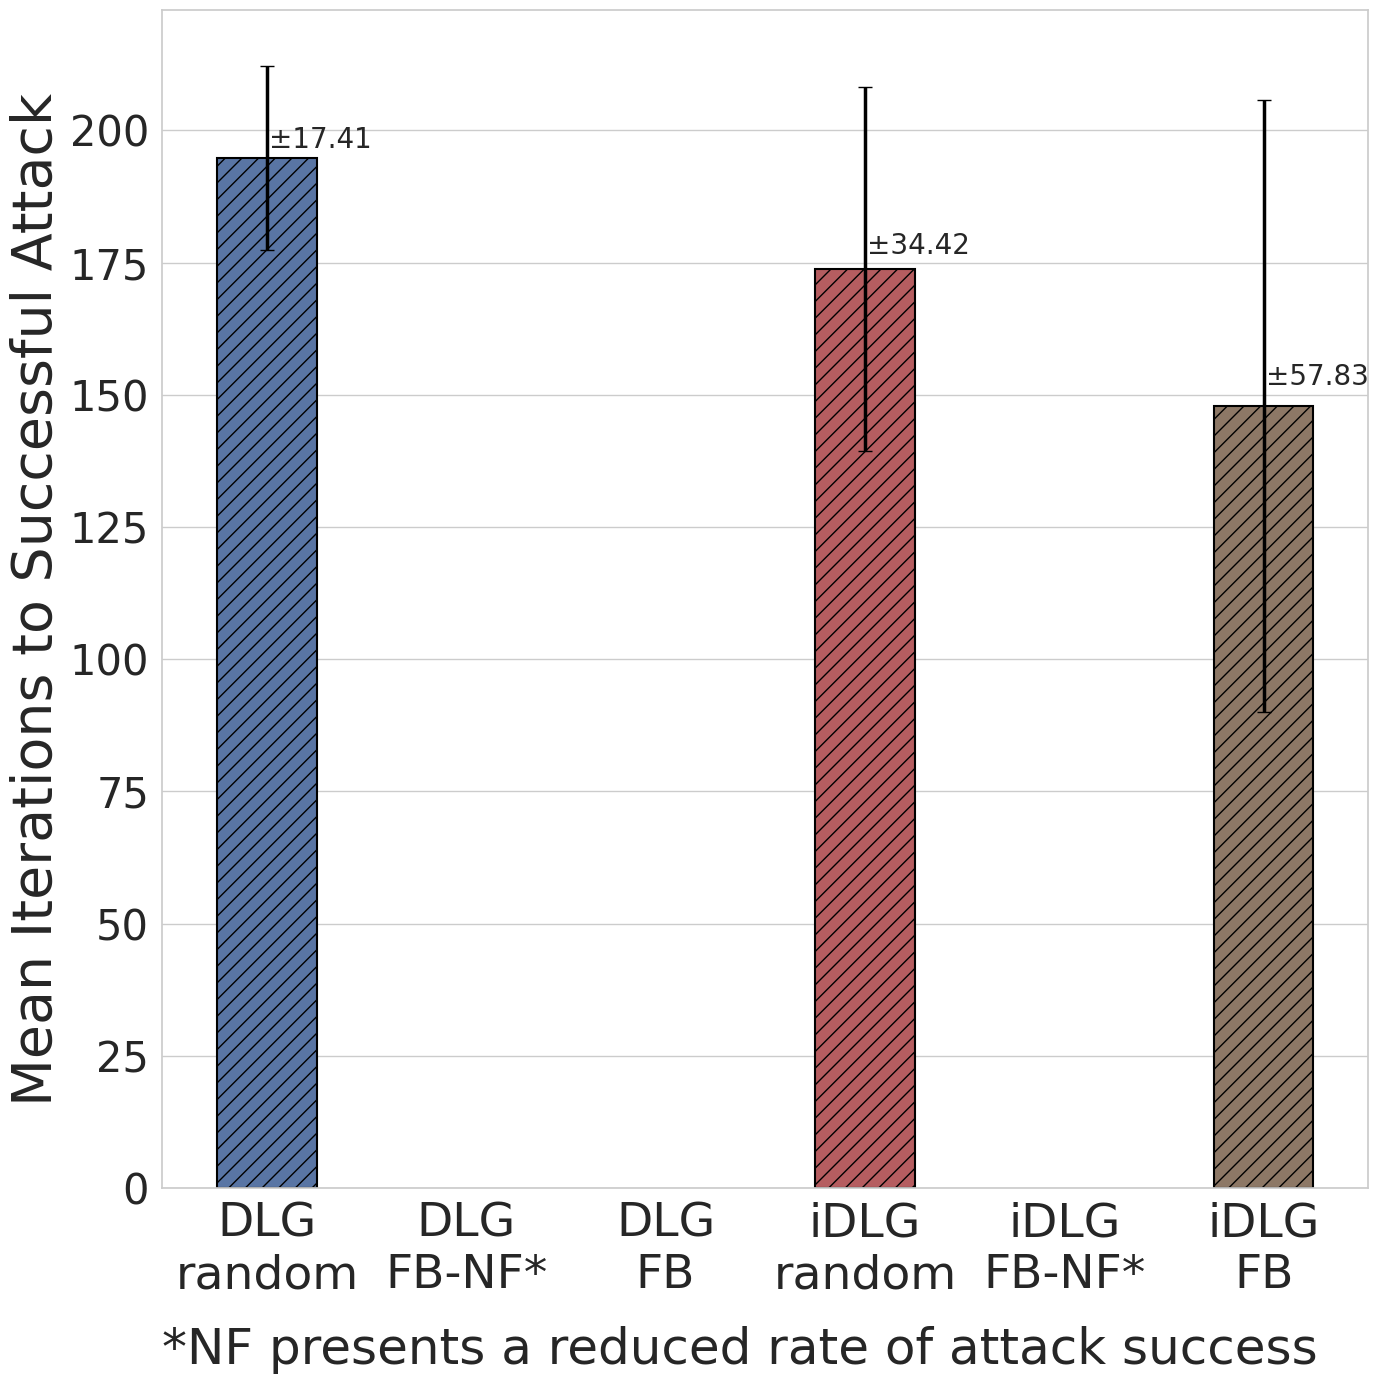

In [27]:

# Filtering just converged occurrences
df_converged = df[df['converged'] == True].sort_values(by=["method", "initializer"], ascending=[True, False])

# the tmp_df is just for visual purposes
tmp_df = df_converged.copy()
tmp_df['method_initializer'] = tmp_df['method_initializer'].str.replace(' ', '\n', 1)

# adding asterisk to NF because it has a very small sample of converged images
tmp_df['method_initializer'] = tmp_df['method_initializer'].str.replace('NF', 'NF*', 1)
# I may chage the name "random" to "original" for better understanding here
#tmp_df['method_initializer'] = tmp_df['method_initializer'].str.replace('random', 'original', 1)

# Grouping by method_initializer and calculating the mean of iters
grouped_iters = tmp_df.groupby('method_initializer')['iters']

# rearranging name order so they fit the same colors as before
mean_iters = grouped_iters.mean().reindex(['DLG\nrandom', 'DLG\nFB-NF*', 'DLG\nFB', 'iDLG\nrandom', 'iDLG\nFB-NF*', 'iDLG\nFB']).reset_index()
# "original" is the same as "random"
#mean_iters = grouped_iters.mean().reindex(['DLG\noriginal', 'DLG\nFB-NF*', 'DLG\nFB', 'iDLG\noriginal', 'iDLG\nFB-NF*', 'iDLG\nFB']).reset_index()

# Sample standard deviation, may change ddof to 1 if needed
std_iters = grouped_iters.std(ddof=0).reindex(['DLG\nrandom', 'DLG\nFB-NF*', 'DLG\nFB', 'iDLG\nrandom', 'iDLG\nFB-NF*', 'iDLG\nFB']).reset_index()

# Setting theme
sns.set_theme(style="whitegrid")

# Customizing colors
palette = sns.color_palette("deep", len(mean_iters))

# Choose figure size and proportions
plt.figure(figsize=(14, 14))

# Plotting barplot
sns.barplot(data=mean_iters, x='method_initializer', y='iters', hue='method_initializer', palette=palette, width=0.5, hatch='//', edgecolor='black', linewidth=1.5, dodge=False, legend=False)

# Adding error bars representing standard deviation
plt.errorbar(range(len(mean_iters)), mean_iters['iters'], yerr=std_iters['iters'], fmt='none', color='black', capsize=5, linewidth=2.5)

# Adding text with standard deviation values
for i, std in enumerate(std_iters['iters']):
    plt.text(i + 0.27, mean_iters['iters'][i] + 0.05 * std, f"±{std:.2f}", ha='center', va='bottom', fontsize=20)

# Labeling graphic
# plt.xlabel(f'Dataset: {DATASET}\nExperiments:{TOTAL_EXP}', fontsize=40, labelpad=20) # comented for article usage
plt.xlabel(f'*NF presents a reduced rate of attack success', fontsize=36, loc="left", labelpad=20)
plt.ylabel('Mean Iterations to Successful Attack', fontsize=40)

# Rotating x labels so they are readable
plt.xticks(fontsize=34)
plt.yticks(fontsize=30)

# Adjust y-axis to start from zero
plt.ylim(bottom=0)

# Plotting
plt.tight_layout()

# Saving with high resolution
plt.savefig(f"{graphics_path}/{dataset}_{TOTAL_EXP}_mean_iter{NAME_MODIFIER}.pdf", dpi=300)

plt.show()


In [28]:
mean_iters


method_initializer       iters
0        DLG\nrandom  194.750000
1        DLG\nFB-NF*         NaN
2            DLG\nFB         NaN
3       iDLG\nrandom  173.800000
4       iDLG\nFB-NF*         NaN
5           iDLG\nFB  147.923077